In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
from datetime import datetime as dt 
import os 

In [2]:
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline 

In [4]:
sns.set_theme(context = 'paper' , style = 'darkgrid' , palette = 'afmhot' , font_scale = 1.1,
             rc = {'figure.figsize' : (5 , 5)})

In [5]:
df = pd.read_csv('London Housing Data.csv')
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,city of london,84409,E09000001,10.0,NaN


In [6]:
df.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
dtype: int64

<AxesSubplot:>

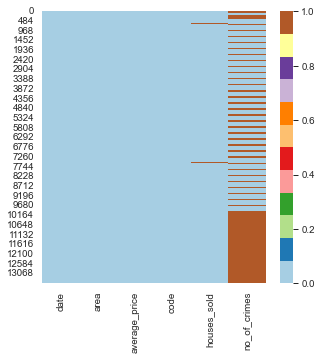

In [7]:
sns.heatmap(df.isnull() , cmap = 'Paired')

### Q. 1) Convert the Datatype of 'Date' column to Date-Time format.

In [8]:
df['date'] = pd.to_datetime(df['date'] , errors = 'coerce')

In [9]:
df['date']

0       1995-01-01
1       1995-02-01
2       1995-03-01
3       1995-04-01
4       1995-05-01
           ...    
13544   2019-09-01
13545   2019-10-01
13546   2019-11-01
13547   2019-12-01
13548   2020-01-01
Name: date, Length: 13549, dtype: datetime64[ns]

### Q. 2) Add a new column ''year'' in the dataframe, which contains years only.(B.2) Add a new column ''month'' as 2nd column in the dataframe, which contains month only.

In [10]:
df['year'] = df['date'].dt.year

In [11]:
df['year']

0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
13544    2019
13545    2019
13546    2019
13547    2019
13548    2020
Name: year, Length: 13549, dtype: int64

In [12]:
df['month'] = df['date'].dt.month

In [13]:
df['month']

0         1
1         2
2         3
3         4
4         5
         ..
13544     9
13545    10
13546    11
13547    12
13548     1
Name: month, Length: 13549, dtype: int64

### Q. 3) Remove the columns 'year' and 'month' from the dataframe.

In [14]:
df.drop(['year' , 'month'] , axis = 1 , inplace = True)

In [16]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,city of london,82203,E09000001,7.0,NaN
2,1995-03-01,city of london,79121,E09000001,14.0,NaN
3,1995-04-01,city of london,77101,E09000001,7.0,NaN
4,1995-05-01,city of london,84409,E09000001,10.0,NaN


### Q. 4) Show all the records where 'No. of Crimes' is 0. And, how many such records are there ?

In [17]:
df[ df['no_of_crimes'] == 0]

,date,area,average_price,code,houses_sold,no_of_crimes
72,2001-01-01,city of london,284262,E09000001,24.0,0.0
73,2001-02-01,city of london,198137,E09000001,37.0,0.0
74,2001-03-01,city of london,189033,E09000001,44.0,0.0
75,2001-04-01,city of london,205494,E09000001,38.0,0.0
76,2001-05-01,city of london,223459,E09000001,30.0,0.0
...,...,...,...,...,...,...
178,2009-11-01,city of london,397909,E09000001,11.0,0.0
179,2009-12-01,city of london,411955,E09000001,16.0,0.0
180,2010-01-01,city of london,464436,E09000001,20.0,0.0
181,2010-02-01,city of london,490525,E09000001,9.0,0.0


In [18]:
df[ df['no_of_crimes'] == 0].shape[0]

104

### Q. 5) What is the maximum & minimum 'average_price' per year in england ?

In [19]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,city of london,82203,E09000001,7.0,NaN
2,1995-03-01,city of london,79121,E09000001,14.0,NaN
3,1995-04-01,city of london,77101,E09000001,7.0,NaN
4,1995-05-01,city of london,84409,E09000001,10.0,NaN


In [20]:
df['year'] = df['date'].dt.year

In [21]:
df.groupby('year')['average_price'].agg(['min' , 'max'])

,min,max
year,,
1995,41688,200722
1996,40722,223197
1997,42353,265112
1998,43510,277600
1999,43969,354241
2000,47604,397353
2001,49045,451028
2002,54746,497538
2003,67520,488704


### Q. 6) What is the Maximum & Minimum No. of Crimes recorded per area ?

In [22]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1995
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1995
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1995
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1995


In [23]:
df.groupby('area')['no_of_crimes'].agg(['max' , 'min'])

,max,min
area,,
barking and dagenham,2049.0,1217.0
barnet,2893.0,1703.0
bexley,1914.0,860.0
brent,2937.0,1850.0
bromley,2637.0,1441.0
camden,4558.0,2079.0
city of london,10.0,0.0
croydon,3263.0,2031.0
ealing,3401.0,1871.0


### Q. 7) Show the total count of records of each area, where average price is less than 100000.

In [25]:
df[df['average_price'] < 100000]['area'].value_counts()

north east              112
north west              111
yorks and the humber    110
east midlands            96
west midlands            94
england                  87
barking and dagenham     85
south west               78
east of england          76
newham                   72
bexley                   64
waltham forest           64
lewisham                 62
havering                 60
south east               59
greenwich                59
croydon                  57
enfield                  54
sutton                   54
hackney                  53
redbridge                52
southwark                48
tower hamlets            47
outer london             46
hillingdon               44
lambeth                  41
hounslow                 41
brent                    40
london                   39
merton                   35
haringey                 33
bromley                  33
inner london             31
ealing                   31
kingston upon thames     30
harrow              